<a href="https://colab.research.google.com/github/greo234/electricity-weather/blob/main/London_Smart_meter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Define paths
project_dir = '/content/drive/My Drive/Elect_Project/electricity-weather'
notebook_name = 'London_Smart_meter.ipynb'
notebook_path = os.path.join(project_dir, notebook_name)


In [6]:

folder_path = '/content/drive/My Drive/Small LCL Data'
files = os.listdir(folder_path)
csv_files = [f for f in files if f.endswith('.csv')]
print(len(csv_files))


168


In [7]:
dfs = []
for files in csv_files:
    full_path = os.path.join(folder_path, files)
    df = pd.read_csv(full_path)
    dfs.append(df)

In [8]:
combined_data = pd.concat(dfs, ignore_index=True)
combined_data.head()
combined_data.head()


,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000036,Std,2012-11-08 10:30:00.0000000,0.003
1,MAC000036,Std,2012-11-08 11:00:00.0000000,0.032
2,MAC000036,Std,2012-11-08 11:30:00.0000000,0.035
3,MAC000036,Std,2012-11-08 12:00:00.0000000,0
4,MAC000036,Std,2012-11-08 12:30:00.0000000,0


In [9]:
combined_data

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000036,Std,2012-11-08 10:30:00.0000000,0.003
1,MAC000036,Std,2012-11-08 11:00:00.0000000,0.032
2,MAC000036,Std,2012-11-08 11:30:00.0000000,0.035
3,MAC000036,Std,2012-11-08 12:00:00.0000000,0
4,MAC000036,Std,2012-11-08 12:30:00.0000000,0
...,...,...,...,...
167932469,MAC004268,Std,2013-06-29 07:00:00.0000000,0.151
167932470,MAC004268,Std,2013-06-29 07:30:00.0000000,0.278
167932471,MAC004268,Std,2013-06-29 08:00:00.0000000,0.128
167932472,MAC004268,Std,2013-06-29 08:30:00.0000000,0.049


In [9]:
combined_data.describe()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
count,84000000,84000000,84000000,84000000
unique,2920,1,40175,7340
top,MAC000145,Std,2012-11-20 00:00:00.0000000,0
freq,39752,84000000,5798,973675


In [10]:
# Check for missing values in the entire DataFrame
missing_values = combined_data.isnull().sum()

# Display missing values for each column
print(missing_values)



LCLid                      0
stdorToU                   0
DateTime                   0
KWH/hh (per half hour)     0
dtype: int64


In [11]:

# Convert DateTime column to datetime format
combined_data['DateTime'] = pd.to_datetime(combined_data['DateTime'])

In [12]:

# Split 'DateTime' into 'Date' and 'Time' columns
combined_data['Date'] = combined_data['DateTime'].dt.date
combined_data['Time'] = combined_data['DateTime'].dt.time

In [18]:
#rearranging columns
columns = ['LCLid', 'stdorToU', 'DateTime', 'Date', 'Time', 'KWH/hh (per half hour) ']
combined_data = combined_data[columns]
combined_data = combined_data.drop(columns=['DateTime'])
combined_data

,LCLid,stdorToU,Date,Time,KWH/hh (per half hour)
0,MAC000036,Std,2012-11-08,10:30:00,0.003
1,MAC000036,Std,2012-11-08,11:00:00,0.032
2,MAC000036,Std,2012-11-08,11:30:00,0.035
3,MAC000036,Std,2012-11-08,12:00:00,0
4,MAC000036,Std,2012-11-08,12:30:00,0
...,...,...,...,...,...
167932469,MAC004268,Std,2013-06-29,07:00:00,0.151
167932470,MAC004268,Std,2013-06-29,07:30:00,0.278
167932471,MAC004268,Std,2013-06-29,08:00:00,0.128
167932472,MAC004268,Std,2013-06-29,08:30:00,0.049


In [19]:
#save the combined data frame
combined_data.to_csv('/content/drive/My Drive/meter_data.csv', index=False)

In [27]:
print(combined_data.columns)

Index(['LCLid', 'stdorToU', 'Date', 'Time', 'KWH/hh (per half hour) '], dtype='object')


In [29]:
# Convert 'KWH/hh (per half hour)' to numeric
combined_data['KWH/hh (per half hour) '] = pd.to_numeric(combined_data['KWH/hh (per half hour) '], errors='coerce')


# Group by 'LCLid', 'stdorToU', and 'Date' columns and sum the 'KWH/hh (per half hour)' column to get daily consumption
daily_consumption = combined_data.groupby(['LCLid', 'stdorToU', 'Date'], as_index=False)['KWH/hh (per half hour) '].sum()

# Rename the columns for clarity
daily_consumption.columns = ['LCLid', 'stdorToU', 'Date', 'Daily_Consumption_KWH']

# Display the first few rows of the daily consumption data
print(daily_consumption.head())


       LCLid stdorToU        Date  Daily_Consumption_KWH
0  MAC000002      Std  2012-10-12                  7.098
1  MAC000002      Std  2012-10-13                 11.087
2  MAC000002      Std  2012-10-14                 13.223
3  MAC000002      Std  2012-10-15                 10.257
4  MAC000002      Std  2012-10-16                  9.769


In [30]:
daily_consumption.to_csv('/content/drive/My Drive/daily_elect_data.csv', index=False)

In [31]:
daily_consumption

,LCLid,stdorToU,Date,Daily_Consumption_KWH
0,MAC000002,Std,2012-10-12,7.098
1,MAC000002,Std,2012-10-13,11.087
2,MAC000002,Std,2012-10-14,13.223
3,MAC000002,Std,2012-10-15,10.257
4,MAC000002,Std,2012-10-16,9.769
...,...,...,...,...
3510428,MAC005567,Std,2014-02-24,4.107
3510429,MAC005567,Std,2014-02-25,5.762
3510430,MAC005567,Std,2014-02-26,5.066
3510431,MAC005567,Std,2014-02-27,3.217


In [67]:
household_counts_sorted = daily_consumption['LCLid'].value_counts().sort_values(ascending=False)
print(household_counts_sorted)


LCLid
MAC000148    829
MAC000155    829
MAC000149    829
MAC000145    829
MAC000156    829
            ... 
MAC005559      1
MAC001150      1
MAC005560      1
MAC005563      1
MAC005556      1
Name: count, Length: 5566, dtype: int64


In [68]:
# Group by tariff type
tariff = daily_consumption.groupby('stdorToU')['Daily_Consumption_KWH']

# Calculate mean daily consumption for each tariff type
mean_consumption = tariff.mean()

# Calculate median daily consumption for each tariff type
median_consumption = tariff.median()

# Calculate total consumption for each tariff type
total_consumption = tariff.sum()


<ipython-input-69-33f1fbcd09f6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_consumption.index, y=mean_consumption.values, palette='viridis')


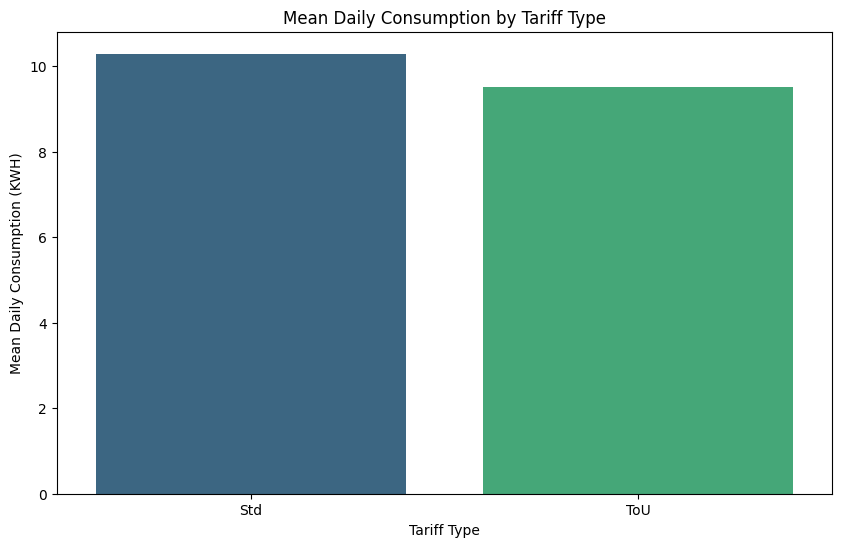

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_consumption.index, y=mean_consumption.values, palette='viridis')
plt.title('Mean Daily Consumption by Tariff Type')
plt.xlabel('Tariff Type')
plt.ylabel('Mean Daily Consumption (KWH)')
plt.show()


In [70]:
from scipy import stats

# Perform t-test for mean daily consumption between Std and ToU tariffs
t_stat, p_value = stats.ttest_ind(tariff.get_group('Std'), tariff.get_group('ToU'), equal_var=False)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")


T-test results: t-statistic = 70.43944521798683, p-value = 0.0


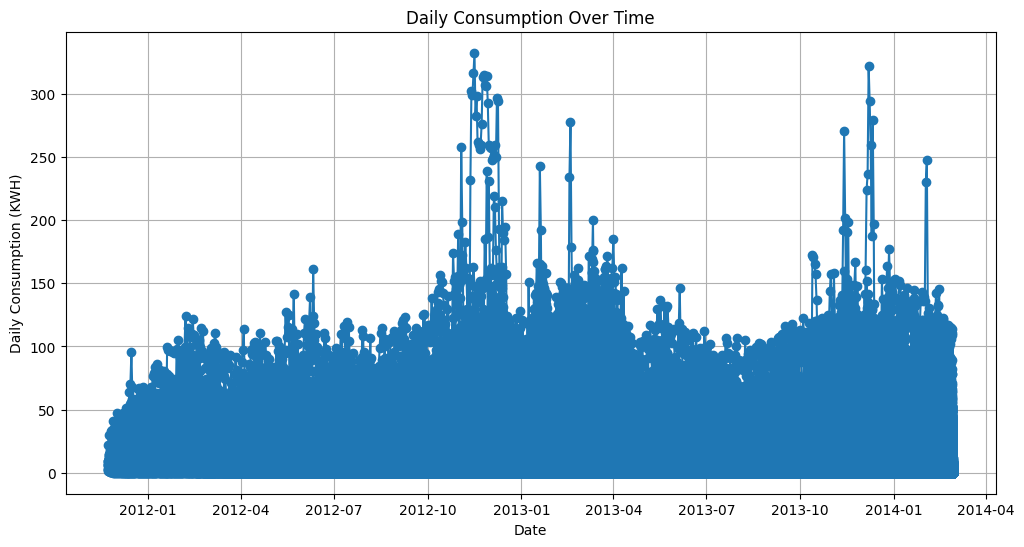

In [57]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime format if it's not already
daily_consumption['Date'] = pd.to_datetime(daily_consumption['Date'])

# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(daily_consumption['Date'], daily_consumption['Daily_Consumption_KWH'], marker='o', linestyle='-')
plt.title('Daily Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Consumption (KWH)')
plt.grid(True)
plt.show()


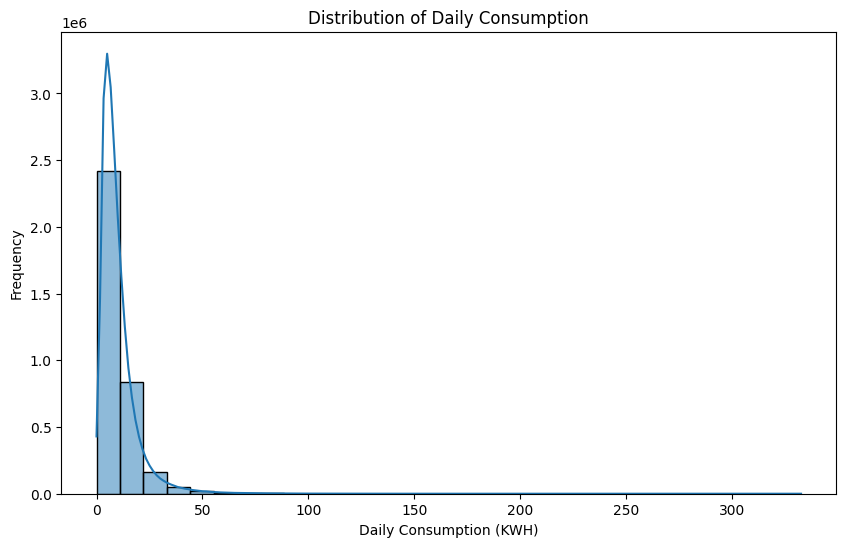

In [58]:
import seaborn as sns

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(daily_consumption['Daily_Consumption_KWH'], bins=30, kde=True)
plt.title('Distribution of Daily Consumption')
plt.xlabel('Daily Consumption (KWH)')
plt.ylabel('Frequency')
plt.show()


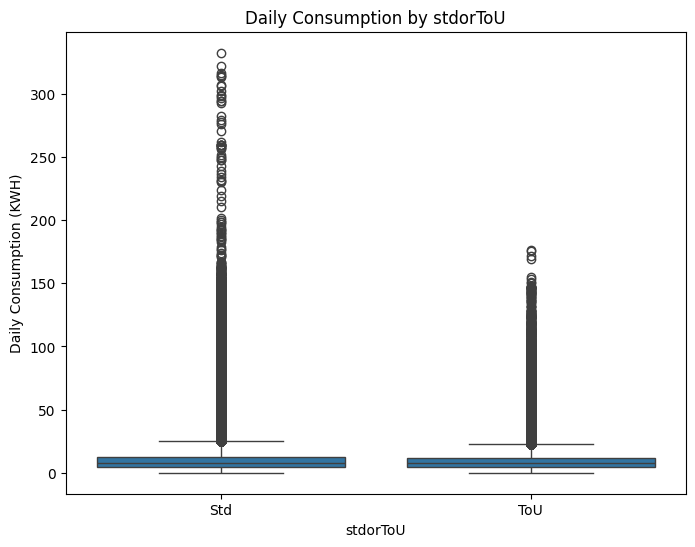

In [59]:
# Box plot by stdorToU
plt.figure(figsize=(8, 6))
sns.boxplot(x='stdorToU', y='Daily_Consumption_KWH', data=daily_consumption)
plt.title('Daily Consumption by stdorToU')
plt.xlabel('stdorToU')
plt.ylabel('Daily Consumption (KWH)')
plt.show()


<ipython-input-61-d2c6f6b677de>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Daily_Consumption_KWH', data=daily_consumption, ci=None)


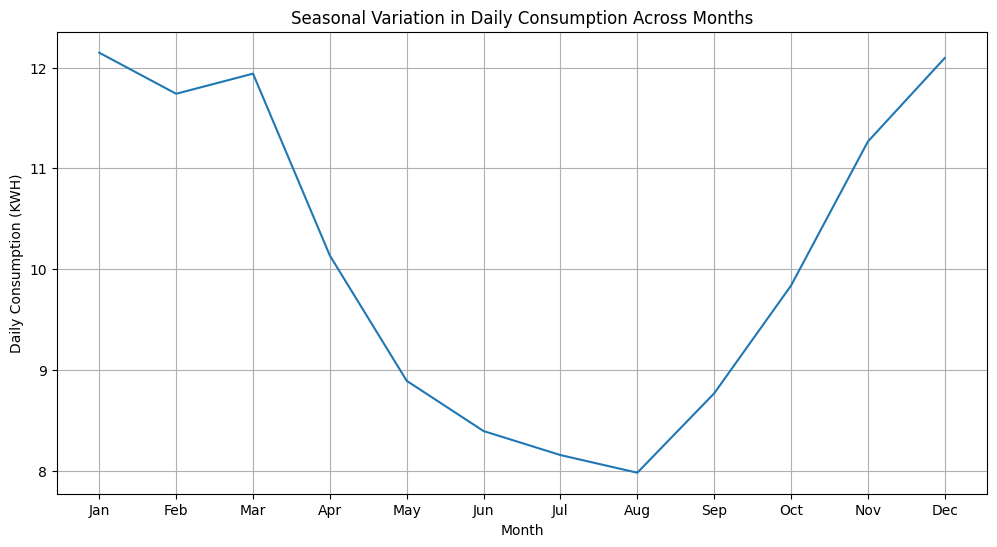

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Date' is already in datetime format in daily_consumption
daily_consumption['Month'] = daily_consumption['Date'].dt.month

# Seasonal plot across all years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Daily_Consumption_KWH', data=daily_consumption, ci=None)
plt.title('Seasonal Variation in Daily Consumption Across Months')
plt.xlabel('Month')
plt.ylabel('Daily Consumption (KWH)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


**PREPROCESSING WEATHER DATA**

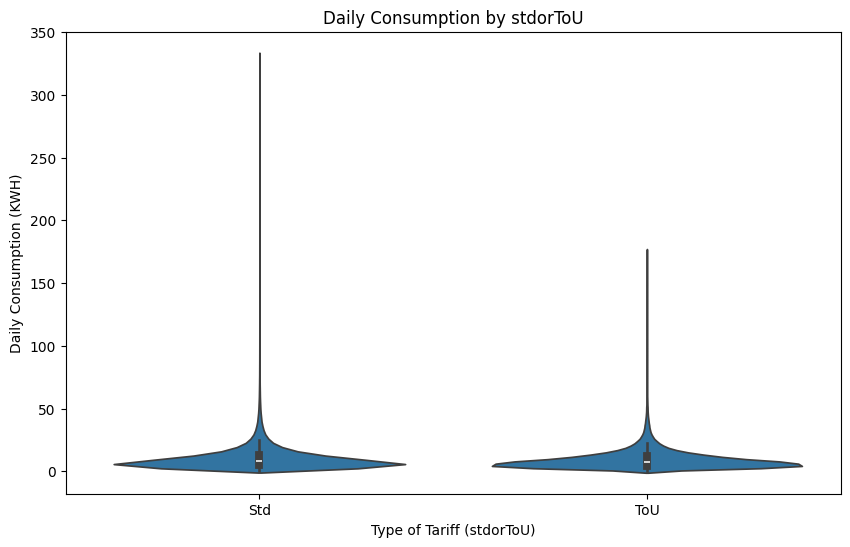

In [63]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='stdorToU', y='Daily_Consumption_KWH', data=daily_consumption)
plt.title('Daily Consumption by stdorToU')
plt.xlabel('Type of Tariff (stdorToU)')
plt.ylabel('Daily Consumption (KWH)')
plt.show()


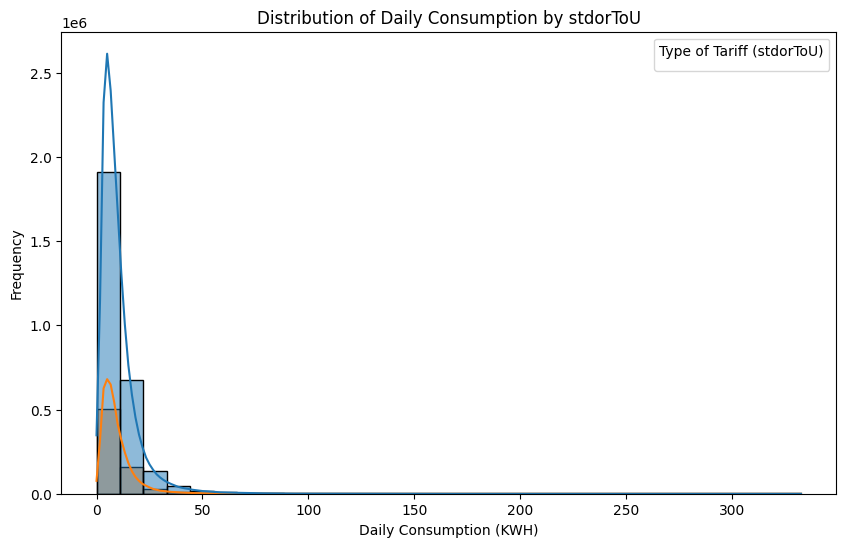

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(data=daily_consumption, x='Daily_Consumption_KWH', hue='stdorToU', kde=True, bins=30)
plt.title('Distribution of Daily Consumption by stdorToU')
plt.xlabel('Daily Consumption (KWH)')
plt.ylabel('Frequency')
plt.legend(title='Type of Tariff (stdorToU)')
plt.show()


In [32]:


# Navigate into the cloned directory
#cloning github
!git clone https://github.com/greo234/electricity-weather.git

import os
os.chdir('electricity-weather')

# Verify the contents of the directory
!ls


Cloning into 'electricity-weather'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 434.61 KiB | 1.50 MiB/s, done.
Resolving deltas: 100% (1/1), done.
README.md  weather_data.zip


In [33]:
# Unzip the weather data folder
import zipfile
with zipfile.ZipFile('weather_data.zip', 'r') as zip_ref:
    zip_ref.extractall('weather_data')

# Verifying the contents
!ls weather_data

cloud_cover.txt  mean_temp.txt	radiation.txt  snow_depth.txt
Humidity.txt	 ppt.txt	sea_level.txt  sunshine.txt


In [34]:
# Read the first file separately to select specific columns
first_file = "weather_data/cloud_cover.txt"
df_first = pd.read_csv(first_file, skiprows=18, delimiter=',', skipinitialspace=True)

df_first

,SOUID,DATE,CC,Q_CC
0,116440,19790101,2,0
1,116440,19790102,6,0
2,116440,19790103,5,0
3,116440,19790104,8,0
4,116440,19790105,6,0
...,...,...,...,...
16431,116440,20231227,8,0
16432,116440,20231228,7,0
16433,116440,20231229,6,0
16434,116440,20231230,7,0


In [35]:

# List all files in the directory except the first file
all_files = [file for file in os.listdir('weather_data') if file.endswith('.txt') and file != 'cloud_cover.txt']


In [36]:

# Read PP column from each remaining file and store in a list of DataFrames
dfs = []
for file in all_files:
    file_path = os.path.join('weather_data', file)
    df = pd.read_csv(file_path, skiprows=18, usecols=[2], delimiter=',', skipinitialspace=True)
    dfs.append(df)


In [37]:
# Concatenate all DataFrames along columns (axis=1) to create the final DataFrame
final_df = pd.concat([df_first] + dfs, axis=1)


In [38]:
columns_to_drop = ['SOUID','Q_CC']
final_df.drop(columns_to_drop, axis=1, inplace=True)
final_df

,DATE,CC,RR,TG,HU,SS,PP,SD,QQ
0,19790101,2,4,-41,83,70,10190,9,52
1,19790102,6,0,-26,76,17,10253,8,27
2,19790103,5,0,-28,86,0,10205,4,13
3,19790104,8,0,-26,68,0,10084,2,13
4,19790105,6,0,-8,73,20,10225,1,29
...,...,...,...,...,...,...,...,...,...
16431,20231227,8,46,89,89,0,10067,0,12
16432,20231228,7,48,112,81,2,10051,0,15
16433,20231229,6,0,106,78,7,10071,0,20
16434,20231230,7,56,89,87,0,10046,0,12


In [51]:

# Create DataFrame
weather_df = pd.DataFrame(final_df)

# Convert DATE column to datetime format
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'], format='%Y%m%d')

In [52]:
# Define the start and end dates for filtering
start_date = '2011-11-23'
end_date = '2014-02-28'

# Filter final_df based on the date range
filt_w = weather_df[(weather_df['DATE'] >= start_date) & (weather_df['DATE'] <= end_date)]
# Resetting the index to start from 0
filt_w.reset_index(drop=True, inplace=True)
filt_w

,DATE,CC,RR,TG,HU,SS,PP,SD,QQ
0,2011-11-23,7,2,68,93,20,10272,0,35
1,2011-11-24,3,2,86,88,20,10271,0,35
2,2011-11-25,3,0,110,78,50,10245,0,52
3,2011-11-26,4,0,102,79,7,10258,0,24
4,2011-11-27,3,0,118,69,59,10213,0,55
...,...,...,...,...,...,...,...,...,...
824,2014-02-24,4,32,109,75,44,10050,0,82
825,2014-02-25,5,26,94,78,20,10005,0,60
826,2014-02-26,1,28,74,73,77,10127,0,111
827,2014-02-27,4,48,89,74,49,10070,0,90


In [55]:
filt_w.to_csv('/content/drive/My Drive/weather_data.csv', index=False)

In [53]:


# Convert 'Date' column to datetime format in both DataFrames
daily_consumption['Date'] = pd.to_datetime(daily_consumption['Date'])
filt_w['DATE'] = pd.to_datetime(filt_w['DATE'])


# Merge household consumption and weather data on 'Date'
merged_df = pd.merge(daily_consumption, filt_w, left_on='Date', right_on='DATE', how='inner')

# Drop the duplicate 'DATE' column after merging if needed
merged_df.drop(columns=['DATE'], inplace=True)

# Display the merged DataFrame
print(merged_df.head())

<ipython-input-53-dad9c528b038>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_w['DATE'] = pd.to_datetime(filt_w['DATE'])


       LCLid stdorToU       Date  Daily_Consumption_KWH  CC  RR   TG  HU  SS  \
0  MAC000002      Std 2012-10-12                  7.098   5   0  123  73  64   
1  MAC000003      Std 2012-10-12                 13.434   5   0  123  73  64   
2  MAC000004      Std 2012-10-12                  1.522   5   0  123  73  64   
3  MAC000005      ToU 2012-10-12                  4.448   5   0  123  73  64   
4  MAC000006      Std 2012-10-12                  4.074   5   0  123  73  64   

      PP  SD   QQ  
0  10058   0  106  
1  10058   0  106  
2  10058   0  106  
3  10058   0  106  
4  10058   0  106  


In [54]:
merged_df

,LCLid,stdorToU,Date,Daily_Consumption_KWH,CC,RR,TG,HU,SS,PP,SD,QQ
0,MAC000002,Std,2012-10-12,7.098,5,0,123,73,64,10058,0,106
1,MAC000003,Std,2012-10-12,13.434,5,0,123,73,64,10058,0,106
2,MAC000004,Std,2012-10-12,1.522,5,0,123,73,64,10058,0,106
3,MAC000005,ToU,2012-10-12,4.448,5,0,123,73,64,10058,0,106
4,MAC000006,Std,2012-10-12,4.074,5,0,123,73,64,10058,0,106
...,...,...,...,...,...,...,...,...,...,...,...,...
3510428,MAC000267,Std,2011-12-05,12.654,1,0,48,77,31,10061,0,35
3510429,MAC000268,Std,2011-12-05,3.099,1,0,48,77,31,10061,0,35
3510430,MAC000269,Std,2011-12-05,1.116,1,0,48,77,31,10061,0,35
3510431,MAC000270,Std,2011-12-05,12.937,1,0,48,77,31,10061,0,35


In [56]:
merged_df.to_csv('/content/drive/My Drive/electricity_weather.csv', index=False)